In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import constants
import Plotting as pl
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

styleDictB={'axes.facecolor': '#000000',
 'axes.edgecolor': '#FFFFFF',
 'axes.grid': False,
 'axes.labelcolor': '#FFFFFF',
 'figure.facecolor': '#000000',
 'grid.color': '#b0b0b0',
 'text.color': '#FFFFFF',
 'xtick.color': '#FFFFFF',
 'ytick.color': '#FFFFFF',
 'patch.edgecolor': '#FFFFFF',
}
styleDictW={'axes.facecolor': '#FFFFFF',
 'axes.edgecolor': '#000000',
 'axes.grid': False,
 'axes.labelcolor': '#000000',
 'figure.facecolor': '#FFFFFF',
 'grid.color': '#b0b0b0',
 'text.color': '#000000',
 'xtick.color': '#000000',
 'ytick.color': '#000000',
 'patch.edgecolor': '#000000',
}

plt.rcParams['font.size'] = 12

In [2]:
propColor={
    constants.COSMICRAY: ['#cc1470','#004733'],
    constants.IDENS: ['#f9393c','#90be6d','#624488'],
    constants.INTERSTELLARRAD: ['#46af8f','#4d194d'],
    constants.SHOCKVEL:['#f9844a','#f9c74f','#277da1'],
    constants.FTEMP:['#f9844a','#f9c74f','#277da1']
}

propOrder={
    constants.HOTCORE: 
    {constants.FTEMP: ['50.0', '100.0', '300.0'],
    constants.COSMICRAY: ['10.0', '1000.0'],
    constants.INTERSTELLARRAD: [ '3.0', '1000.0'],
    constants.IDENS: ['1000000.0', '10000000.0', '100000000.0']},
    constants.SHOCK: 
    {constants.SHOCKVEL: ['10.0', '25.0', '40.0'],
    constants.COSMICRAY: ['10.0', '1000.0'],
    constants.INTERSTELLARRAD: [ '3.0', '1000.0'],
    constants.IDENS: ['1000.0', '10000.0', '100000.0']}
    }

propLabels={
    constants.HOTCORE: 
    {constants.FTEMP: [50e0, 100e0, 300e0],
    constants.COSMICRAY: [10e0, 1000e0],
    constants.INTERSTELLARRAD: [ 3e0, 1000e0],
    constants.IDENS: [1000000e0, 10000000e0, 100000000e0]},
    constants.SHOCK: 
    {constants.SHOCKVEL: [10e0, 25e0, 40e0],
    constants.COSMICRAY: [10e0, 1000e0],
    constants.INTERSTELLARRAD: [ 3e0, 1000e0],
    constants.IDENS: [1000e0, 10000e0, 100000e0]}
    }

propxLabels={
    constants.HOTCORE: 
    {constants.FTEMP: "Final temperature [K]",
    constants.COSMICRAY: "Cosmic ray ionisation rate [$\zeta/\zeta_0$]",
    constants.INTERSTELLARRAD: "Interstellar radiation field [Habing]",
    constants.IDENS: "Initial density [cm$^{-3}$]"},
    constants.SHOCK: 
    {constants.SHOCKVEL: "Shock velocity [km s$^{−1}$]",
    constants.COSMICRAY: "Cosmic ray ionisation rate [$\zeta/\zeta_0$]",
    constants.INTERSTELLARRAD: "Interstellar radiation field [Habing]",
    constants.IDENS: "Initial density [cm$^{-3}$]"}
    }

In [3]:
dfhc=pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, constants.species, singleDf=True)
dfsh=pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, constants.species, singleDf=True)

hcdf=pl.boxplotDF(dfhc, constants.species, constants.physical, constants.HOTCORE)
shdf_tmax=pl.boxplotDF(dfsh, constants.species, constants.physical, constants.SHOCK)
shdf=pl.boxplotDF(dfsh, constants.species, constants.physical, constants.SHOCK, maxT=False)

dfDic={constants.HOTCORE: dfhc, constants.SHOCK: dfsh}
dfDicBox=[{constants.HOTCORE: hcdf}, {constants.SHOCK: shdf_tmax, 'moment': constants.TMAX}, {constants.SHOCK: shdf, 'moment': constants.FINAL}]

# Time Evolution

In [4]:
styleB={'sns': styleDictB, 'colores': ['#ffadad','#ffd6a5','#fdffb6','#caffbf','#9bf6ff','#a0c4ff','#bdb2ff','#ffc6ff'], 'bkgdcolor': 'black'}
styleW={'sns': styleDictW, 'colores': ['#ff0a0a','#ff910a','#592720','#00693E','#001314','#0a68ff','#6200B8','#ff33ff'], 'bkgdcolor': 'white'}

In [5]:
tdic={'Paper': 2*['Huang+2024','Hüttemeister+1997','Hüttemeister+1997','Hüttemeister+1997','Hüttemeister+1997','Hüttemeister+1997','Nakajima+2023','Nakajima+2023','Harada+2019','Harada+2019','Harada+2019','Saito+2016'],
      'Galaxy': 2*['NGC 1068','NGC 253','M 82','IC 342','Maffei 2','NGC 6946','NGC 1068','NGC 1068','M 83','M 83','M 83','VV 114'],
      'N': 2*[5459301214848490,500000000000000,17500000000000,76666666666666.7,40000000000000,30000000000000,270000000000000,76000000000000,287800000000000,240200000000000,149000000000000,192727272727273],
      'Type': 2*['','','','','','','CND','SBR','','','',''],
      'time':[1e-5,1e-5,1e-5,1e-5,1e-5,1e-5,1e-5,1e-5,1e-5,1e-5,1e-5,1e-5]+[1e25,1e25,1e25,1e25,1e25,1e25,1e25,1e25,1e25,1e25,1e25,1e25]
      }

obsDf=pd.DataFrame(tdic)

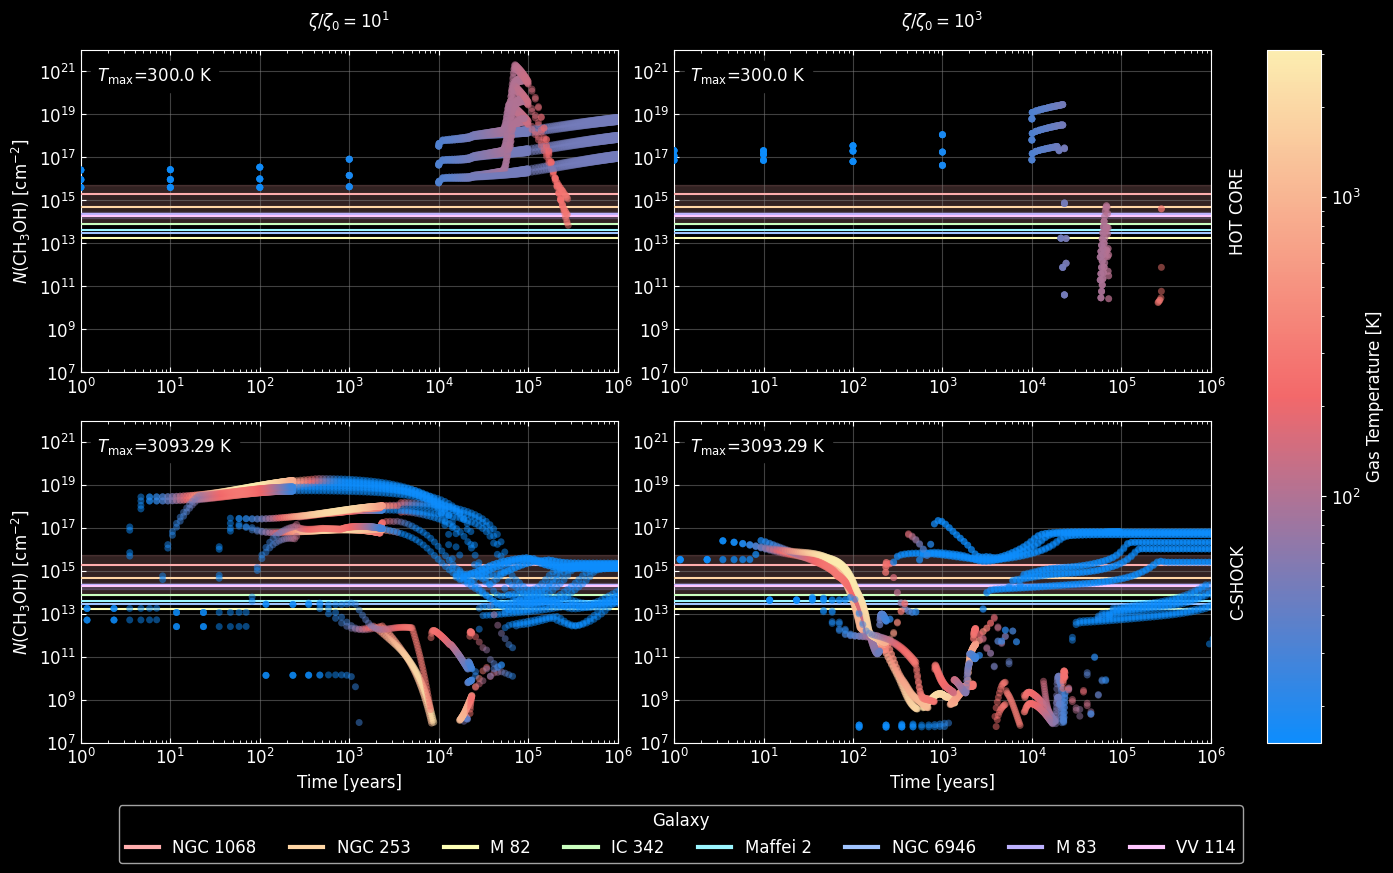

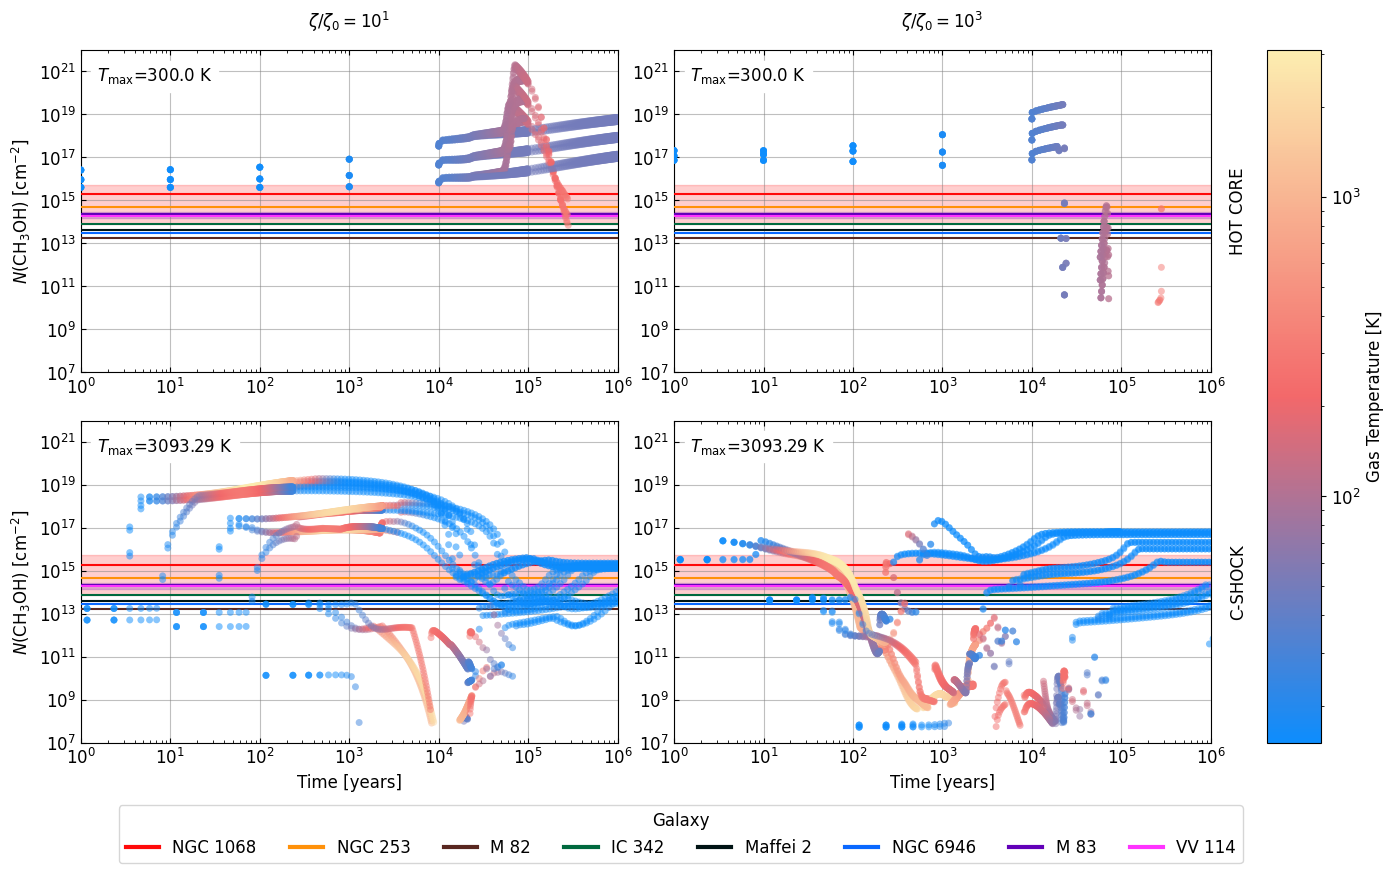

In [6]:
for styleic, colores, bkgdcolor in [styleB.values(), styleW.values()]:
    sns.set_style(rc=styleic)
    fig = plt.figure(figsize=(16, 9))
    gs = GridSpec(2, 2+1, figure=fig, width_ratios=2*[10]+[1],
                wspace=0.15, hspace=0.15)

    norm = colors.LogNorm(vmin=dfDic[constants.SHOCK]['gasTemp'].min(), vmax=dfDic[constants.SHOCK]['gasTemp'].max())
    cmap=sns.blend_palette(['#0d8dfd','#f3686a','#fcedb0'], as_cmap=True)

    for tipo, df in dfDic.items():
        i = 0 if tipo == constants.HOTCORE else 1
        for j, zeta in enumerate([10.0,1000.0]):
            ax=fig.add_subplot(gs[i,j])
            sns.scatterplot(data=df[df['zeta']==zeta], x='Time', y='N_CH3OH',
                            hue='gasTemp', palette=cmap, hue_norm=norm,
                            alpha=0.5, s=25,
                            linewidth=0, 
                            ax=ax, zorder=10, legend=None)
            
            sns.lineplot(data=obsDf, x='time', y='N',
                hue='Galaxy', palette=colores,
                errorbar=lambda x: (x.min(), x.max()),
                ax=ax, zorder=5, legend=None)
            
            ax.grid(color='grey', alpha=0.5, zorder=2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xbound(1e0,1e6)
            ax.set_ybound(1e7,1e22)
            ax.tick_params(axis='both', which='both',direction='in', top=True)
            
            ax.set_xlabel(r'Time [years]' if i==1 else None)
            ax.set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]' if j==0 else None)

            ax.text(x=0.03, y=0.95, s=r"$T_\mathrm{max}$"+f"={df[df['zeta']==zeta]['gasTemp'].max()} K",
                    backgroundcolor=bkgdcolor,
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax.transAxes)

            if j==1:
                ax.text(1.05, 0.5, tipo.upper() if tipo==constants.HOTCORE else tipo.upper().replace(' ', '-'),
                        horizontalalignment='center',
                        verticalalignment='center',
                        rotation='vertical',
                        transform=ax.transAxes)
            if i==0:
                ax.text(0.5, 1.05, r"$\zeta/\zeta_0=10^1$" if j==0 else r"$\zeta/\zeta_0=10^3$",
                        horizontalalignment='center',
                        verticalalignment='bottom',
                        transform=ax.transAxes)
            
    cax=fig.add_subplot(gs[:, -1])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, cax=cax, label='Gas Temperature [K]')

    galaxy_lines = [Line2D([0], [0], color=color, linewidth=3) for color in colores]
    fig.legend(galaxy_lines, [gal for gal in obsDf['Galaxy'].unique()], title='Galaxy', loc='upper center', bbox_to_anchor=(0.5,0.05), ncols=8)

    fig.savefig(f"TimeEvolution_CH3OH_columnDensity.png", dpi=300, bbox_inches='tight')
    # plt.close()

In [7]:
sns.set_style(rc=styleDictB)

# Box Plots

In [8]:
def format_e(n: float) -> str:
    """
    Formats a number with scientific notation.

    Args:
        n: The number to be formatted.

    Returns:
        The formatted number in the specified format.
    """
    if not isinstance(n, (int, float)):
        raise TypeError("Input must be a number")

    # Format the number in scientific notation
    formatted_number = '{:.1e}'.format(n)

    # Split into parts: mantissa and exponent
    mantissa, exponent = formatted_number.split('e')

    # Remove the sign from the exponent if present
    exponent = exponent.lstrip('+-')

    # Remove leading zeros from the exponent
    exponent = exponent.lstrip('0')

    # If the exponent is empty, set it to '0'
    if not exponent:
        exponent = '0'

    # Check if mantissa is 1, if so, return only 10^exponent
    if float(mantissa) == 1:
        return '10^{{{}}}'.format(exponent)

    # Format the output with LaTeX-style representation
    return '{}\cdot10^{{{}}}'.format(mantissa, exponent)

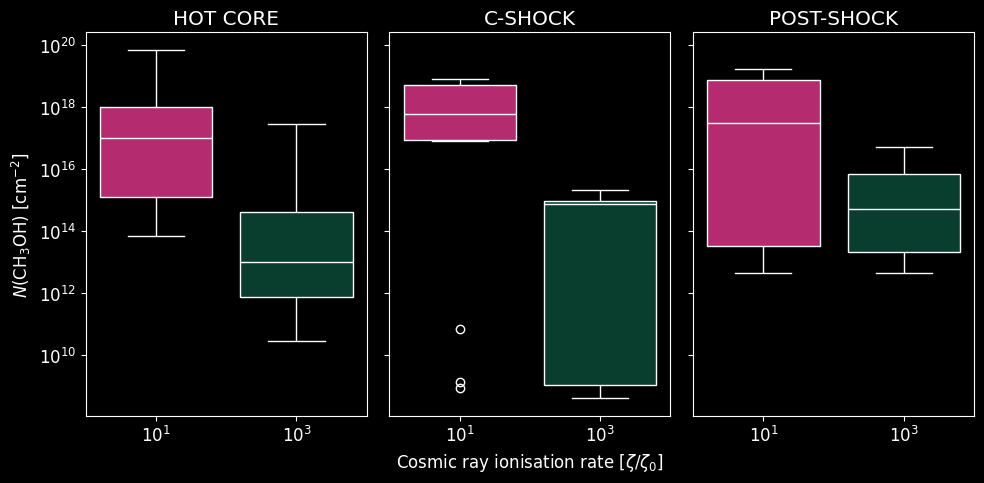

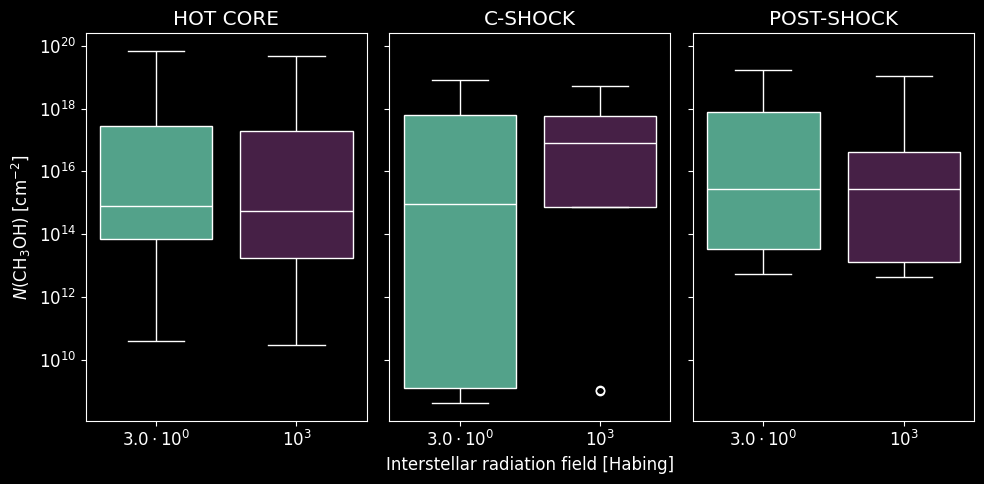

In [15]:
for enfasis in [constants.COSMICRAY, constants.INTERSTELLARRAD]:
    fig, axs = plt.subplots(1,3, figsize=(10,5), layout='tight', sharey=True)
    for i, dic in enumerate(dfDicBox):
        tipo, df = [(k, dic[k])for k in dic][0]
        if tipo==constants.SHOCK: moment = [dic[k] for k in dic][1]
        title = tipo.upper() if tipo==constants.HOTCORE else 'C-SHOCK' if moment==constants.TMAX else 'POST-SHOCK'

        ax=axs[i]
        sns.boxplot(data=df, x=enfasis,
                    hue=enfasis, legend=None,
                    palette=propColor[enfasis], hue_order=propOrder[tipo][enfasis],
                    order=propOrder[tipo][enfasis],
                    linecolor='white', #linewidth=2,
                    y='N_CH3OH', ax=ax, log_scale=True)
        ax.set_title(title)
        ax.set_xticks(propOrder[tipo][enfasis], labels=[f"${format_e(val)}$" for val in propLabels[tipo][enfasis]])
        ax.set_xlabel(propxLabels[tipo][enfasis] if i==1 else None)
    
    axs[0].set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]')
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{enfasis.upper()}.png", dpi=300, bbox_inches='tight')
    # plt.close()

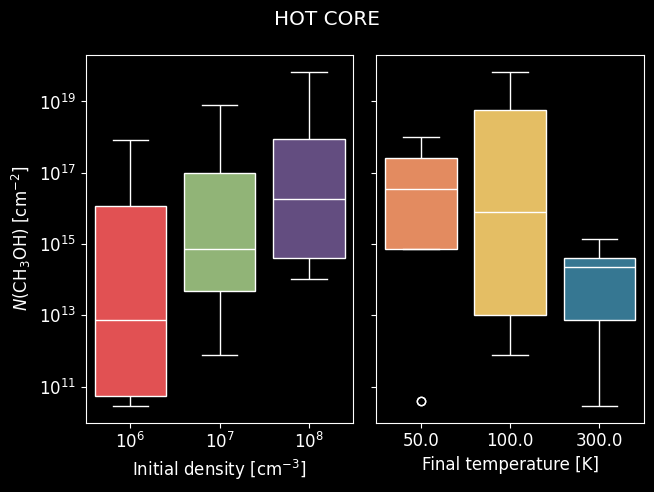

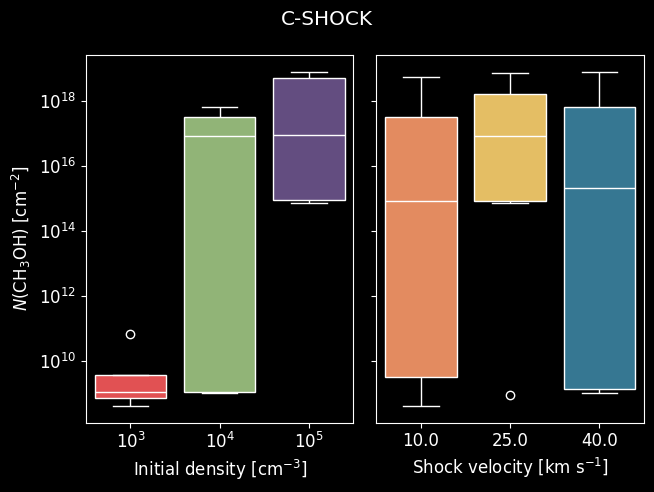

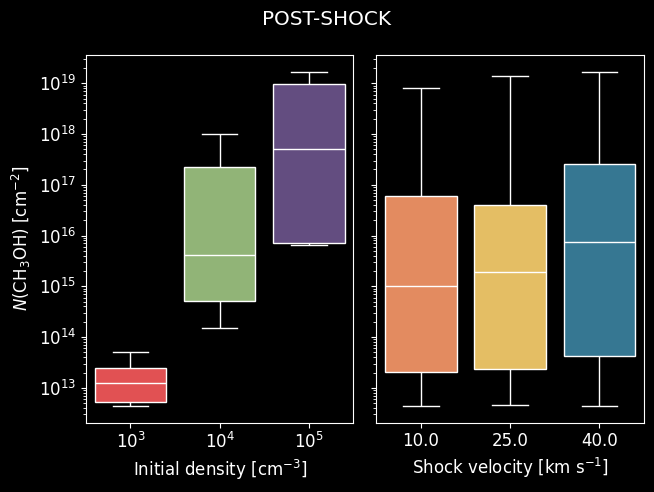

In [14]:
for dic in dfDicBox:
    tipo, df = [(k, dic[k] )for k in dic][0]
    if tipo==constants.SHOCK: moment = [dic[k] for k in dic][1]
    varparam=constants.FTEMP if tipo==constants.HOTCORE else constants.SHOCKVEL
    title = tipo.upper() if tipo==constants.HOTCORE else 'C-SHOCK' if moment==constants.TMAX else 'POST-SHOCK'

    fig, axs = plt.subplots(1,2, figsize=(6.7,5), layout='tight', sharey=True)

    for i, enfasis in enumerate([constants.IDENS, varparam]):
        sns.boxplot(data=df, x=enfasis,
                    hue=enfasis, legend=None,
                    palette=propColor[enfasis], hue_order=propOrder[tipo][enfasis],
                    order=propOrder[tipo][enfasis],
                    linecolor='white', #linewidth=2,
                    y='N_CH3OH', log_scale=True,
                    ax=axs[i])
        if enfasis==constants.IDENS: axs[i].set_xticks(propOrder[tipo][enfasis], labels=[f"${format_e(val)}$" for val in propLabels[tipo][enfasis]])
        axs[i].set_xlabel(propxLabels[tipo][enfasis])
        
    axs[0].set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]')
    fig.suptitle(title)
    fig.savefig(f"BOXPLOT_CH3OH_columnDensity_by{title}.png", dpi=300, bbox_inches='tight')
    # plt.close()

# Extra Plots

In [11]:
def abunDf(df, cols=['runName', 'shockVel', 'Density', 'Time', 'cosmicRay','av', 'gasTemp', 'iDens', 'radfield','interstellarRad', 'zeta', 'moment']):
    testdf= pd.concat([df[cols+['N_CH3OH']], df[cols+['N_#CH3OH']]], ignore_index=True)
    testdf['species']=testdf.apply(lambda row: '#CH3OH' if np.isnan(row['N_CH3OH']) else 'CH3OH', axis=1)
    testdf['N']=testdf.apply(lambda row: row['N_#CH3OH'] if np.isnan(row['N_CH3OH']) else row['N_CH3OH'], axis=1)

    return testdf[cols+['species','N']]

In [12]:
dfhc_extra=pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, ['CH3OH','#CH3OH'], singleDf=True)
dfsh_extra=pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, ['CH3OH','#CH3OH'], singleDf=True)

hcdf_extra=pl.boxplotDF(dfhc_extra, ['CH3OH','#CH3OH'], constants.physical, constants.HOTCORE)
shdf_tmax_extra=pl.boxplotDF(dfsh_extra, ['CH3OH','#CH3OH'], constants.physical, constants.SHOCK)
shdf_cooldown_extra=pl.boxplotDF(dfsh_extra, ['CH3OH','#CH3OH'], constants.physical, constants.SHOCK, maxT=False)

shdf_cooldown_extra['moment']='POST-SHOCK'
shdf_tmax_extra['moment']='SHOCK'

shdf_extra=pd.concat([shdf_cooldown_extra,shdf_tmax_extra], ignore_index=True)

shdf_extra=abunDf(shdf_extra)
hcdf_extra=abunDf(hcdf_extra, cols=['runName', 'Density', 'Time', 'cosmicRay','av', 'gasTemp', 'fTemp','iDens', 'radfield','interstellarRad', 'zeta'])

shdf_extra[constants.SHOCKVEL] = shdf_extra[constants.SHOCKVEL].astype(str)

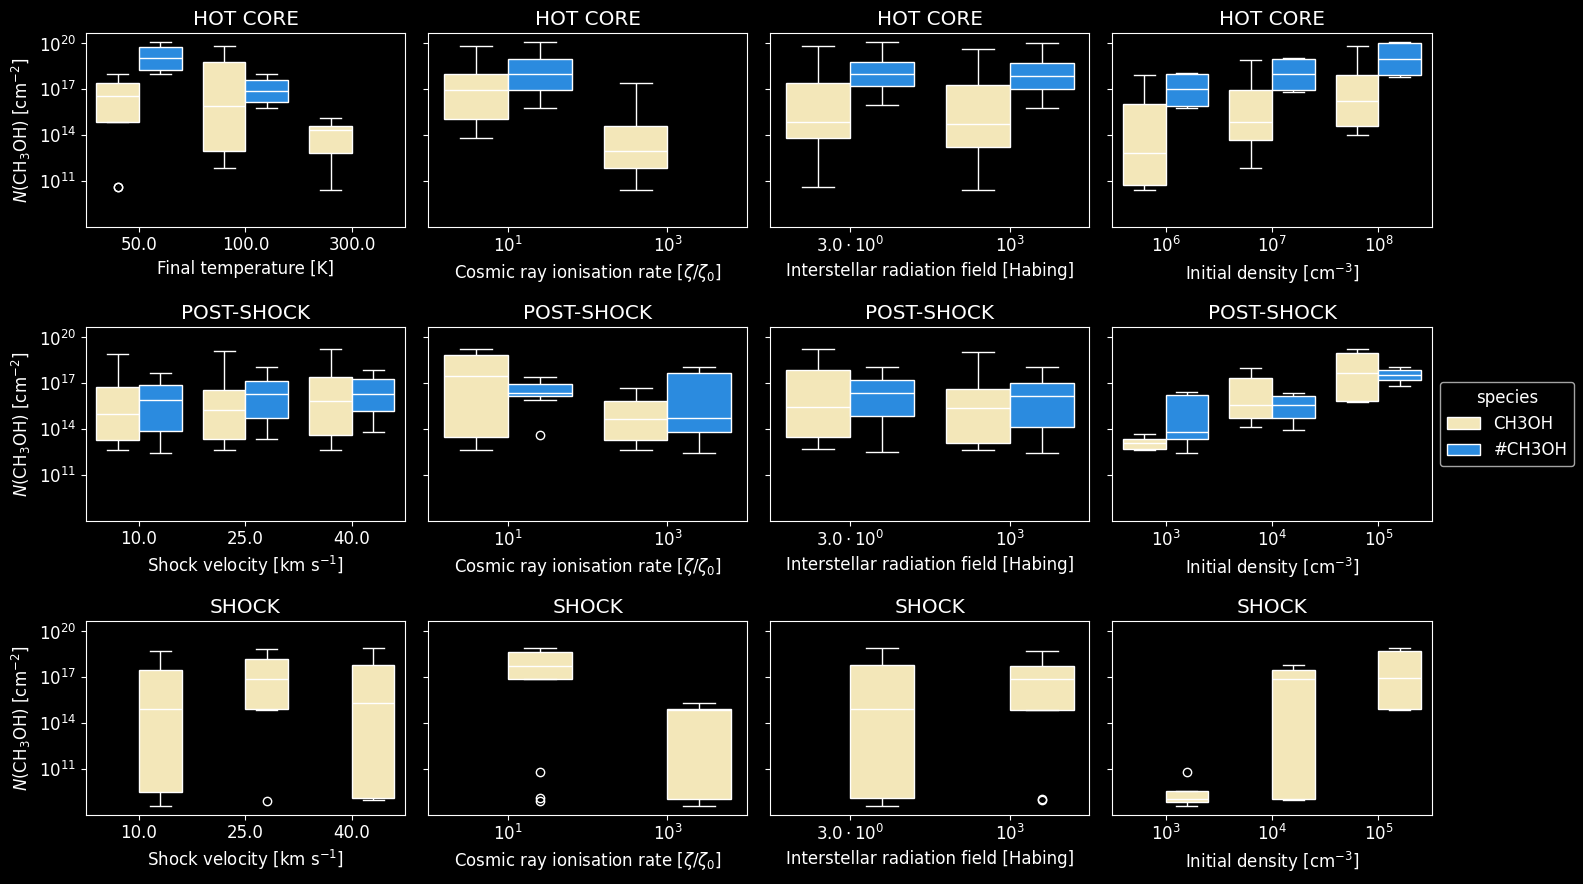

In [13]:
fig, axs = plt.subplots(3,4, figsize=(16,9), layout='tight', sharey=True)

for i, moment in enumerate([constants.HOTCORE,'POST-SHOCK','SHOCK']):
    if moment==constants.HOTCORE:
        tipo = constants.HOTCORE
        df = hcdf_extra
    else:
        tipo = constants.SHOCK
        df = shdf_extra[shdf_extra['moment']==moment]
    title = moment.upper()

    for j, enfasis in enumerate(propOrder[tipo]):
        ax=axs[i][j]
        sns.boxplot(data=df, x=enfasis,
                    hue='species', legend= 'auto' if i==1 and j==3 else None,
                    palette={'#CH3OH': '#0d8dfd', 'CH3OH': '#fcedb0'},
                    order=propOrder[tipo][enfasis],
                    linecolor='white',
                    y='N', ax=ax, log_scale=True)
        if i==1 and j==3: sns.move_legend(ax, 'center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(title)
        ax.set_xticks(propOrder[tipo][enfasis], labels=[val if enfasis in [constants.FTEMP,constants.SHOCKVEL] else f"${format_e(val)}$" for val in propLabels[tipo][enfasis]])
        ax.set_xlabel(propxLabels[tipo][enfasis])
    
    axs[i][0].set_ylabel(r'$N$(CH$_3$OH) [cm$^{-2}$]')
fig.savefig(f"BOXPLOT_surfaceVSgas_extra.png", dpi=300, bbox_inches='tight')
# plt.close()